In [1]:
import numpy as np
import xarray as xr
import pandas as pd
# from google.colab import drive
import datetime
import glob

#### Get list of all files for desired year

In [2]:
yr_sel = 2019
fdir = '/mnt/tcnas01/musgrave/ryan_ridata/oper_short_edecks/{yr_sel}/'.format(yr_sel=yr_sel)
#fname_test = '20072600AL9220_ships.txt'
all_files = glob.glob(fdir+'*.dat')
no_files = len(all_files)
fname_test = all_files[1]

In [3]:
fname_test

'/mnt/tcnas01/musgrave/ryan_ridata/oper_short_edecks/2019/eal012019_RIOB_2019052106.dat'

#### Read in each file one at a time

Relevant information:
* TIME
* LAND (KM)
* Prob of RI for 25 kt RI threshold
* Prob of RI for 30 kt RI threshold
* Prob of RI for 35 kt RI threshold
* LAT (DEG N)
* LONG (DEG W)
* Name
* Case No.
* DATE
* TIME

#### Create ultimate dataframe

In [4]:
#test_lines
# case = test_lines[3].split()[2]
# date = test_lines[3].split()[3]
# name = test_lines[3].split()[1]
#start_time = test_lines[3].split()[4]
#for line in test_lines:
 #   if line.startswith('LAND (KM)'):
  #      print(line.split()[2:])

In [5]:
with open(fname_test) as fn:
    for line in fn:
        #if line.startswith("TIME (HR)"):
        
        print(line)

AL, 01, 2019052106, RI, RIOB,  12, 298N,  690W,   0,  20,  35,    ,   0,  12

AL, 01, 2019052106, RI, RIOB,  24, 298N,  690W,   0,  25,  35,    ,   0,  24

AL, 01, 2019052106, RI, RIOB,  24, 298N,  690W,   0,  30,  35,    ,   0,  24

AL, 01, 2019052106, RI, RIOB,  24, 298N,  690W,   0,  35,  35,    ,   0,  24

AL, 01, 2019052106, RI, RIOB,  24, 298N,  690W,   0,  40,  35,    ,   0,  24

AL, 01, 2019052106, RI, RIOB,  36, 298N,  690W,   0,  45,  35,    ,   0,  36

AL, 01, 2019052106, RI, RIOB,  48, 298N,  690W,   0,  55,  35,    ,   0,  48

AL, 01, 2019052106, RI, RIOB,  72, 298N,  690W,   0,  65,  35,    ,   0,  72



In [6]:
RI_prob_df_ALL = pd.DataFrame(columns={'BASIN','Cyclone No','Date_full','Prob Item','Technique','TAU','LAT','LON',
                              'Prob(RI)','d_I','V_final','Forecaster ID','RI start time','RI end time'})
column_names = ['BASIN','Cyclone No','Date_full','Prob Item','Technique','TAU','LAT','LON',
                              'Prob(RI)','d_I','V_final','Forecaster ID','RI start time','RI end time']
RI_prob_df_ALL = RI_prob_df_ALL.reindex(columns=column_names)
##
for i_name in np.arange(0,len(all_files)):
    #i_name = 4
    i_file = all_files[i_name]
    with open(i_file) as fn:
        #no_lines = len(fn.readlines())
        i_RI_prob = pd.DataFrame(columns={'BASIN','Cyclone No','Date_full','Prob Item','Technique','TAU','LAT','LON',
                             'Prob(RI)','d_I','V_final','Forecaster ID','RI start time','RI end time'},
                      index=np.arange(0,8))
            ## column_names = ['BASIN','Cyclone No','ATCF ID','Prob Item','Technique','TAU','LAT','LON',
             #                 'Prob(RI)','d_I','V_final','Forecaster ID','RI start time','RI end time']
        i_RI_prob = i_RI_prob.reindex(columns=column_names)
        for ifn, line in enumerate(fn):
            i_line = line.split()
           # print(ifn)
           # print(i_line)
            # 

            #i_RI_prob
            i_RI_prob.iloc[ifn] = i_line
    #
        RI_prob_df_ALL = RI_prob_df_ALL.append(i_RI_prob)


In [7]:
RI_prob_df_ALL
#foo = 

,BASIN,Cyclone No,Date_full,Prob Item,Technique,TAU,LAT,LON,Prob(RI),d_I,V_final,Forecaster ID,RI start time,RI end time
0,"AL,","01,","2019052018,","RI,","RIOB,","12,","286N,","687W,","2,","20,","35,",",","0,",12
1,"AL,","01,","2019052018,","RI,","RIOB,","24,","286N,","687W,","0,","25,","35,",",","0,",24
2,"AL,","01,","2019052018,","RI,","RIOB,","24,","286N,","687W,","0,","30,","35,",",","0,",24
3,"AL,","01,","2019052018,","RI,","RIOB,","24,","286N,","687W,","0,","35,","35,",",","0,",24
4,"AL,","01,","2019052018,","RI,","RIOB,","24,","286N,","687W,","0,","40,","35,",",","0,",24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,"EP,","21,","2019111818,","RI,","RIOL,","24,","124N,","1058W,","1,","35,","20,",",","0,",24
4,"EP,","21,","2019111818,","RI,","RIOL,","24,","124N,","1058W,","0,","40,","20,",",","0,",24
5,"EP,","21,","2019111818,","RI,","RIOL,","36,","124N,","1058W,","2,","45,","20,",",","0,",36
6,"EP,","21,","2019111818,","RI,","RIOL,","48,","124N,","1058W,","2,","55,","20,",",","0,",48


In [8]:
RI_prob_df_ALL = RI_prob_df_ALL.replace(',','',regex=True)
RI_prob_df_ALL = RI_prob_df_ALL.drop(columns='Forecaster ID')
RI_prob_df_ALL['ATCF ID'] = RI_prob_df_ALL['BASIN']+RI_prob_df_ALL['Cyclone No']+RI_prob_df_ALL['Date_full'].str[:4]


In [9]:
RI_prob_df_ALL['BASIN'] = RI_prob_df_ALL['BASIN'].replace('AL','ATLANTIC')
RI_prob_df_ALL['BASIN'] = RI_prob_df_ALL['BASIN'].replace('EP','EAST_PACIFIC')

In [10]:
RI_prob_df_ALL['DATE'] = pd.to_datetime(RI_prob_df_ALL['Date_full'],format='%Y%m%d%H')
#pd.to_datetime(RI_prob_df_ALL['ATCF ID'])#.dt.strftime('%Y-%m-%d %H')


In [11]:
RI_prob_df_ALL[['TAU','Prob(RI)','d_I','V_final','RI start time','RI end time']] = RI_prob_df_ALL[['TAU','Prob(RI)','d_I','V_final','RI start time','RI end time']].astype(int)

In [12]:
sel_test = RI_prob_df_ALL[RI_prob_df_ALL['TAU']==24]
#sel_test = sel_test[sel_test['RI end time']==24]
sel_test = sel_test[sel_test['d_I']==30]
sel_test
# RI_prob_df_ALL
sel_test['Technique'] = sel_test['Technique'].replace('RIOC','Consensus',regex=True)
sel_test['Technique'] = sel_test['Technique'].replace('RIOL','RII',regex=True)
#
sel_test = sel_test.rename(columns={'Prob(RI)':'30/24','Technique':'RI Type','DATE':'Date',
                                   'LAT':'LAT_0','LON':'LON_0'})
#
sel_test = sel_test.mask(sel_test['30/24']>500)

In [15]:
yr_sel

2019

In [16]:
fname_save = 'DATA/SHIPS_RII_rapid_intense_probs_{yr}.csv'.format(yr=yr_sel)
sel_test.to_csv(fname_save)

<AxesSubplot:ylabel='30/24'>

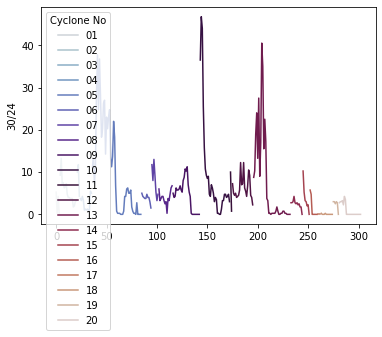

In [13]:
foo = sel_test.groupby(['BASIN','Cyclone No','Date']).mean().xs(('ATLANTIC')).reset_index()
#,'10')).reset_index().plot(x='Date',y='30/24')
import seaborn as sns
sns.lineplot(data=foo,x=foo.index,y='30/24',hue='Cyclone No',palette='twilight')

<AxesSubplot:xlabel='BASIN', ylabel='30/24'>

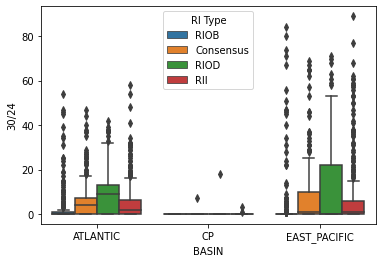

In [14]:
sns.boxplot(data=sel_test,x='BASIN',y='30/24',hue='RI Type')